In [19]:
import random


data_400 = list(range(400))

if len(data_400) < 20:
    raise ValueError("The list must contain at least 20 numbers.")

picked_20 = random.sample(data_400, 20)
print(picked_20)

[49, 276, 11, 177, 371, 379, 236, 271, 131, 20, 315, 198, 89, 336, 262, 229, 180, 307, 269, 101]


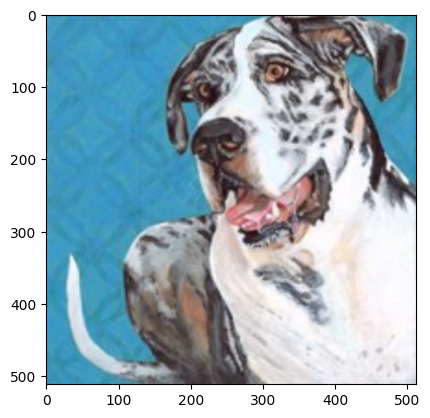

In [20]:
from PIL import Image
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

directory = r"C:\Users\saffr\OneDrive - Nanyang Technological University\NTU\Y4 FYP\fyp_nightshade\extracted_clean_images"

for i in range(20):
    file_name_suffix = picked_20[i]
    file_name = f"original_data/{file_name_suffix}.p"
    with open(file_name, 'rb') as f:
        data = pickle.load(f)
    image_data = data['img']
    plt.imshow(np.array(image_data))
    txt_data = data['text']
    img_filename = f"{txt_data}.jpg"
    img_path = os.path.join(directory, img_filename)
    img_jpg = Image.fromarray(np.array(image_data))
    img_jpg.save(img_path)
    txt_filename = f"{txt_data}.txt"
    txt_path = os.path.join(directory, txt_filename)
    with open(txt_path, 'w') as txt_file:
        txt_file.write(txt_data)

In [21]:
import shutil

# Define the two subfolders
folder1 = "extracted_clean_images"
folder2 = "300_poisoned_dataset"
survey_folder = "survey"

# List jpg files in both folders
jpgs1 = set([f for f in os.listdir(folder1) if f.lower().endswith('.jpg')])
jpgs2 = set([f for f in os.listdir(folder2) if f.lower().endswith('.jpg')])

# Find identical filenames
common_jpgs = jpgs1 & jpgs2

# Copy one copy from folder1 to survey_folder, folder2 to its survey subfolder
for jpg in common_jpgs:
    jpg_clean = jpg[:-4] + "_clean.jpg"
    src_path = os.path.join(folder1, jpg)
    dst_path = os.path.join(survey_folder, jpg_clean)
    shutil.copy2(src_path, dst_path)
    
    jpg_poisoned = jpg[:-4] + "_poisoned.jpg"
    src_path = os.path.join(folder2, jpg)
    dst_path = os.path.join(survey_folder, jpg_poisoned)
    shutil.copy2(src_path, dst_path)

In [23]:
survey_folder = "survey"

for fname in os.listdir(survey_folder):
    if fname.lower().endswith('.jpg') and fname.startswith("image"):
        new_fname = fname.replace("image", "spot_the_diff", 1)
        os.rename(os.path.join(survey_folder, fname), os.path.join(survey_folder, new_fname))